In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from tqdm import tqdm
import statsmodels.api as sm

In [24]:
#excel files are read and a ticker column is added to each sheet

repertoire = "data" 
dataframes_dict = {}

for fichier in os.listdir(repertoire): 
    chemin_complet = os.path.join(repertoire, fichier)

    if fichier.endswith((".xls", ".xlsx")):  
        print(f"File found : {fichier}")

    try:
        worksheet = pd.read_excel(chemin_complet, sheet_name=None)

        for sheet_name, df in worksheet.items():
            if 'Ticker' not in df.columns:
                df['Ticker'] = sheet_name  
                print(f"Ticker added to {sheet_name}")
                dataframes_dict[f"{fichier}_{sheet_name}"] = df
            else:
                print(f"Column 'Ticker' already existed in {fichier}")

    except Exception as e:
        print(f"Error during the process {fichier} : {e}")

File found : Batch 1 BIS.xlsx
Ticker added to AAPL
Ticker added to COP
Ticker added to ETN
Ticker added to LLY
Ticker added to ORCL
Ticker added to LRCX
Ticker added to XOM
Ticker added to ADI
Ticker added to PG
Ticker added to KLAC
Ticker added to MDT
Ticker added to MO
Ticker added to IBM
Ticker added to CVX
Ticker added to GE
Ticker added to ABT
Ticker added to BMY
Ticker added to TT
Ticker added to AMD
File found : Batch 2 bis.xlsx
Ticker added to RTX
Ticker added to MRK
Ticker added to TXN
Ticker added to CAT
Ticker added to BA
Ticker added to TMO
Ticker added to DE
Ticker added to SYK
Ticker added to HON
Ticker added to DHR
Ticker added to AMAT
Ticker added to PFE
Ticker added to INTC
Ticker added to PPG
Ticker added to PH
Ticker added to CDNS
Ticker added to EMR
Ticker added to NOC
Ticker added to CL
File found : Batch 3 BIS.xlsx
Ticker added to ITW
Ticker added to ADSK
Ticker added to APD
Ticker added to CHD
Ticker added to BDX
Ticker added to PCAR
Ticker added to HPQ
Ticker ad

In [25]:
#variables are renamed and split by frequency
monthly_list = []
yearly_list = []
quarterly_list = []
daily_tot_return_list = []
daily_vol_list = [] #two daily lists are created because the start dates differ
gics_list = []

for name, df in dataframes_dict.items():
    rename_map = {
        df.columns.values[0]: "Date.1",
        df.columns.values[1]: "Total_Assets",
        df.columns.values[2]: "Common_Equity",
        df.columns.values[3]: "Cash_And_Investments",
        df.columns.values[4]: "R&D_Expenses",
        df.columns.values[5]: "Inventories",
        df.columns.values[6]: "Dividends_Paid",
        df.columns.values[7]: "Gross_Fixed_Assets",
        df.columns.values[8]: "Income_Before_Extra_Items",
        df.columns.values[9]: "Sales_Revenue",
        df.columns.values[10]: "Depreciation_Amortization",

        df.columns.values[12]: "Date.2",
        df.columns.values[13]: "Mkt_Cap_Yearly",
        df.columns.values[14]: "Shares_Outstanding_Yearly",

        df.columns.values[16]: "Date.3",
        df.columns.values[17]: "Net_Income",

        df.columns.values[19]: "Date.4",
        df.columns.values[20]: "Px_Bid",
        df.columns.values[21]: "Px_Ask",
        df.columns.values[22]: "Shares_Outstanding_Monthly",
        df.columns.values[23]: "Mkt_Cap_Monthly",

        df.columns.values[25]: "Date.5",
        df.columns.values[26]: "Px_Last",

        df.columns.values[28]: "Date.6",
        df.columns.values[29]: "Volume",

        df.columns.values[36]: "Industry/Sector",
        df.columns.values[37]: "Gics",
    }

    df.rename(columns=rename_map, inplace=True)

    try:
        df_yearly = df[[
            "Date.1", "Total_Assets", "Common_Equity", "Cash_And_Investments",
            "R&D_Expenses", "Inventories", "Dividends_Paid", "Gross_Fixed_Assets",
            "Income_Before_Extra_Items", "Sales_Revenue", "Depreciation_Amortization",
            "Mkt_Cap_Yearly", "Shares_Outstanding_Yearly"
        ]].copy()
        
        df_quarterly = df[["Date.3", "Net_Income"]].copy()
       
        df_monthly = df[[
            "Date.4", "Px_Bid", "Px_Ask", "Shares_Outstanding_Monthly", "Mkt_Cap_Monthly", 
        ]].copy()

        df_daily_tot_return = df[[
            "Date.5", "Px_Last"
        ]].copy()

        df_daily_vol= df[[
            "Date.6", "Volume"
        ]].copy()

        df_gics = df[[
            "Gics"
        ]].copy()
        
        df_yearly['Ticker'] = df['Ticker'].iloc[0]
        df_monthly['Ticker'] = df['Ticker'].iloc[0]
        df_quarterly['Ticker'] = df['Ticker'].iloc[0]
        df_daily_tot_return['Ticker'] = df['Ticker'].iloc[0]
        df_daily_vol['Ticker'] = df['Ticker'].iloc[0]
        df_gics['Ticker'] = df['Ticker'].iloc[0]

        yearly_list.append(df_yearly)
        monthly_list.append(df_monthly)
        quarterly_list.append(df_quarterly)
        daily_tot_return_list.append(df_daily_tot_return)
        daily_vol_list.append(df_daily_vol)
        gics_list.append(df_gics)


        print(f"{name} : successful yearly / monthly / quarterly / gicssplit")

    except Exception as e:
        print(f"{name} : error during split : {e}")

yearly_df = pd.concat(yearly_list, ignore_index=True)
monthly_df = pd.concat(monthly_list, ignore_index=True)
quarterly_df = pd.concat(quarterly_list, ignore_index=True)
daily_tot_return_df = pd.concat(daily_tot_return_list, ignore_index=True)
daily_vol_df = pd.concat(daily_vol_list, ignore_index=True)
gics_df = pd.concat(gics_list, ignore_index=True)


Batch 1 BIS.xlsx_AAPL : successful yearly / monthly / quarterly / gicssplit
Batch 1 BIS.xlsx_COP : successful yearly / monthly / quarterly / gicssplit
Batch 1 BIS.xlsx_ETN : successful yearly / monthly / quarterly / gicssplit
Batch 1 BIS.xlsx_LLY : successful yearly / monthly / quarterly / gicssplit
Batch 1 BIS.xlsx_ORCL : successful yearly / monthly / quarterly / gicssplit
Batch 1 BIS.xlsx_LRCX : successful yearly / monthly / quarterly / gicssplit
Batch 1 BIS.xlsx_XOM : successful yearly / monthly / quarterly / gicssplit
Batch 1 BIS.xlsx_ADI : successful yearly / monthly / quarterly / gicssplit
Batch 1 BIS.xlsx_PG : successful yearly / monthly / quarterly / gicssplit
Batch 1 BIS.xlsx_KLAC : successful yearly / monthly / quarterly / gicssplit
Batch 1 BIS.xlsx_MDT : successful yearly / monthly / quarterly / gicssplit
Batch 1 BIS.xlsx_MO : successful yearly / monthly / quarterly / gicssplit
Batch 1 BIS.xlsx_IBM : successful yearly / monthly / quarterly / gicssplit
Batch 1 BIS.xlsx_CVX : 

C:\Users\33676\AppData\Local\Temp\ipykernel_25188\2146520589.py:95: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  monthly_df = pd.concat(monthly_list, ignore_index=True)
C:\Users\33676\AppData\Local\Temp\ipykernel_25188\2146520589.py:96: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  quarterly_df = pd.concat(quarterly_list, ignore_index=True)


In [26]:
print(gics_df.head())
gics_df = gics_df.dropna(subset=["Gics"])

# Extraire la colonne "Gics", supprimer doublons, convertir en liste
unique_gics = gics_df["Gics"].drop_duplicates().tolist()

# Afficher le résultat
print("Liste unique des valeurs de Gics :")
for gics in unique_gics:
    print("-", gics)

  Gics Ticker
0  4.0   AAPL
1  7.0   AAPL
2  2.0   AAPL
3  2.0   AAPL
4  2.0   AAPL
Liste unique des valeurs de Gics :
- 4.0
- 7.0
- 2.0
- eqy_dvd_adjust_fact.DT
- 2011-03-01 00:00:00
- 2004-02-24 00:00:00
- 2001-01-02 00:00:00
- 1993-06-29 00:00:00
- 1988-09-20 00:00:00
- 1979-10-03 00:00:00
- 2019-03-11 00:00:00
- 1997-10-16 00:00:00
- 1995-12-21 00:00:00
- 1995-09-19 00:00:00
- 1989-05-01 00:00:00
- 1986-01-30 00:00:00
- 2000-10-13 00:00:00
- 2000-01-19 00:00:00
- 1999-03-01 00:00:00
- 1997-08-18 00:00:00
- 1996-04-17 00:00:00
- 1995-02-23 00:00:00
- 1993-11-09 00:00:00
- 1990-12-24 00:00:00
- 1989-07-03 00:00:00
- 1987-12-21 00:00:00
- 1987-03-25 00:00:00
- 2024-10-03 00:00:00
- 2000-03-17 00:00:00
- 1993-09-16 00:00:00
- 2001-07-19 00:00:00
- 1997-04-14 00:00:00
- 1987-09-15 00:00:00
- 1981-06-12 00:00:00
- 2000-03-16 00:00:00
- 1997-01-07 00:00:00
- 1996-01-04 00:00:00
- 1995-01-05 00:00:00
- 1986-04-15 00:00:00
- 1985-04-16 00:00:00
- 1984-04-17 00:00:00
- 1983-04-05 00:00:00
- 

In [73]:
print(f"Type de yearly_df : {type(yearly_df)}")
print(f"Type de monthly_df : {type(monthly_df)}")
print(f"Type de daily_tot_return_df : {type(daily_tot_return_df)}")
print(f"Type de daily_vol_df : {type(daily_vol_df)}")
print(f"Type de quarterly_df : {type(quarterly_df)}")

Type de yearly_df : <class 'pandas.core.frame.DataFrame'>
Type de monthly_df : <class 'pandas.core.frame.DataFrame'>
Type de daily_tot_return_df : <class 'pandas.core.frame.DataFrame'>
Type de daily_vol_df : <class 'pandas.core.frame.DataFrame'>
Type de quarterly_df : <class 'pandas.core.frame.DataFrame'>


In [ ]:
lists = {
    "yearly": yearly_df,
    "quarterly": quarterly_df,
    "monthly": monthly_df,
    "daily_tot_return": daily_tot_return_df,
    "daily_vol": daily_vol_df
}

for name, df in lists.items():
    #we rename columns starting with "Date.xxx" to "Date"
    df.rename(columns={col: "Date" for col in df.columns if col.startswith("Date")}, inplace=True)
    
    #we convert "Date" column to datetime
    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
    
    #we convert all other columns to float64 (excluding "Date" and "Ticker")
    for col in df.columns:
        if col not in ["Date", "Ticker"]:
            df[col] = pd.to_numeric(df[col], errors='coerce').astype("float64")

    #display column information for verification
    print(f"--- {name.capitalize()} DataFrame ---")
    print(f"  - Colonnes et Types:")
    for col in df.columns:
        print(f"    - {col}: {df[col].dtype}")
    print(f"  - Nombre de lignes: {df.shape[0]}")
    print(f"  - Nombre de colonnes: {df.shape[1]}")
    print("-" * 50)

--- Yearly DataFrame ---
  - Colonnes et Types:
    - Date: datetime64[ns]
    - Total_Assets: float64
    - Common_Equity: float64
    - Cash_And_Investments: float64
    - R&D_Expenses: float64
    - Inventories: float64
    - Dividends_Paid: float64
    - Gross_Fixed_Assets: float64
    - Income_Before_Extra_Items: float64
    - Sales_Revenue: float64
    - Depreciation_Amortization: float64
    - Mkt_Cap_Yearly: float64
    - Shares_Outstanding_Yearly: float64
    - Ticker: object
    - agr: float64
    - cashpr: float64
    - chinv: float64
    - depr: float64
    - dy: float64
    - ep: float64
    - invest: float64
    - rd_mve: float64
    - sp: float64
    - Year: float64
  - Nombre de lignes: 1798
  - Nombre de colonnes: 24
--------------------------------------------------
--- Quarterly DataFrame ---
  - Colonnes et Types:
    - Date: datetime64[ns]
    - Net_Income: float64
    - Ticker: object
    - delta_income: float64
    - direction: float64
    - nincr: float64
  - No

ValueError: cannot assemble with duplicate keys

In [45]:
#NaN Cells
"""
We remove rows where the date column is NaN. When splitting the data by frequency, each row is assigned a ticker.
However, because daily data have more rows than other frequencies, the ticker is excessively duplicated in the lower-frequency 
DataFrames (monthly, quarterly, yearly), leading to rows that are mostly empty.
Dropping rows without a date removes these redundancies without any loss of actual data.
"""


lists["yearly"] = yearly_df.dropna(subset=["Date"])
lists["quarterly"] = quarterly_df.dropna(subset=["Date"])
lists["monthly"] = monthly_df.dropna(subset=["Date"])
lists["daily_vol"] = daily_vol_df.dropna(subset=["Date"])

all_nan_matrices = {}

for name, df in lists.items():  
    
    if "Ticker" in df.columns:
        #compute the percentage of NaNs per column for each ticker
        nan_matrix = df.groupby("Ticker").apply(lambda g: g.isna().mean() * 100)
        all_nan_matrices[name] = nan_matrix
        print(f"\n % Pourcentage de NaN pour {name} :\n", nan_matrix)

C:\Users\33676\AppData\Local\Temp\ipykernel_21396\475017430.py:21: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_matrix = df.groupby("Ticker").apply(lambda g: g.isna().mean() * 100)
C:\Users\33676\AppData\Local\Temp\ipykernel_21396\475017430.py:21: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_matrix = df.groupby("Ticker").apply(lambda g: g.isna().mean() * 100)
C:\Users\33676\AppData\Local\Temp\ipykernel_2139


 % Pourcentage de NaN pour yearly :
         Date  Total_Assets  Common_Equity  Cash_And_Investments  R&D_Expenses  \
Ticker                                                                          
AAPL     0.0           0.0       0.000000              0.000000      0.000000   
ABT      0.0           0.0       0.000000              0.000000      0.000000   
ADI      0.0           0.0       0.000000              0.000000      0.000000   
ADSK     0.0           0.0       0.000000              0.000000      0.000000   
AMAT     0.0           0.0       0.000000              0.000000      0.000000   
AMD      0.0           0.0       0.000000              3.030303      0.000000   
APD      0.0           0.0       0.000000              0.000000      3.030303   
BA       0.0           0.0       0.000000              0.000000      0.000000   
BDX      0.0           0.0       0.000000              0.000000      0.000000   
BMY      0.0           0.0       0.000000              0.000000      0.

C:\Users\33676\AppData\Local\Temp\ipykernel_21396\475017430.py:21: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_matrix = df.groupby("Ticker").apply(lambda g: g.isna().mean() * 100)
C:\Users\33676\AppData\Local\Temp\ipykernel_21396\475017430.py:21: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_matrix = df.groupby("Ticker").apply(lambda g: g.isna().mean() * 100)


In [ ]:
#NaN handling using SimpleImputer
from sklearn.impute import SimpleImputer

#create an imputer to replace NaNs with the mean
imputer = SimpleImputer(strategy="mean")

for name, df in lists.items():
    cols_to_impute = [col for col in df.columns if col not in ["Date", "Ticker"]]
        df[cols_to_impute] = df.groupby("Ticker")[cols_to_impute].transform(lambda x: x.fillna(x.mean()))


In [47]:
yearly_df = lists["yearly"]
quarterly_df = lists["quarterly"]
monthly_df = lists["monthly"]
daily_vol_df = lists["daily_vol"]

In [48]:
#yearly computations    

#mkt cap and shares outstanding were extracted with a BDH formula and are expressed in millions so we have to multiply by 10^6
yearly_df["Mkt_Cap_Yearly"] = yearly_df["Mkt_Cap_Yearly"] * 1e6
yearly_df["Shares_Outstanding_Yearly"] = yearly_df["Shares_Outstanding_Yearly"] * 1e6

In [49]:
#yearly computations

#asset growth (agr)
yearly_df["agr"] = (
    yearly_df["Total_Assets"] - yearly_df.groupby("Ticker")["Total_Assets"].shift(1)
) / yearly_df.groupby("Ticker")["Total_Assets"].shift(1)


#cash productivity (cashpr)
yearly_df.loc[:, "cashpr"] = (
    yearly_df["Mkt_Cap_Yearly"] - yearly_df["Common_Equity"]
) / yearly_df["Cash_And_Investments"]


#change in inventory (chinv)
yearly_df["chinv"] = (
    yearly_df["Inventories"] - yearly_df.groupby("Ticker")["Inventories"].shift(1)
) / yearly_df["Total_Assets"]



#depreciation / Gross Fixed Assets (depr)
yearly_df["depr"] = (
    yearly_df["Depreciation_Amortization"] / 
    yearly_df["Gross_Fixed_Assets"]
)

#dividends to Market Cap (dy)
yearly_df.loc[:, "dy"] = (
    yearly_df["Dividends_Paid"] / 
    yearly_df["Mkt_Cap_Yearly"]
)

#earnings to Price (ep)
yearly_df.loc[:, "ep"] = (
    yearly_df["Income_Before_Extra_Items"] / 
    yearly_df["Mkt_Cap_Yearly"]
)

#investment to assets (invest)
yearly_df.loc[:, "invest"] = (
    yearly_df.groupby("Ticker")["Gross_Fixed_Assets"].transform(lambda x: x - x.shift(1))
    + yearly_df.groupby("Ticker")["Inventories"].transform(lambda x: x - x.shift(1))
) / yearly_df.groupby("Ticker")["Total_Assets"].transform(lambda x: x.shift(1))


#R&D to Market Value of Equity (rd_mve)
yearly_df.loc[:, "rd_mve"] = (
    yearly_df["R&D_Expenses"] / 
    yearly_df["Mkt_Cap_Yearly"]
)

#sales to Price (sp)
yearly_df.loc[:, "sp"] = (
    yearly_df["Sales_Revenue"] / 
    yearly_df["Mkt_Cap_Yearly"]
)

In [50]:
yearly_df.to_excel("yearly_df.xlsx")

In [51]:
#quarterly computations

quarterly_df["delta_income"] = (
    quarterly_df["Net_Income"] - quarterly_df["Net_Income"].shift(1)
)

quarterly_df["direction"] = np.sign(quarterly_df["delta_income"])


def compute_nincr(direction_series):
    nincr = []
    count = 0
    prev = 0
    for d in direction_series:
        if d == prev and d != 0:
            count += 1
        elif d != 0:
            count = 1
        else:
            count = 0
        nincr.append(count * d if d != 0 else 0)
        prev = d if d != 0 else prev
    return nincr

quarterly_df["nincr"] = (
    quarterly_df.groupby("Ticker")["direction"].transform(compute_nincr)
)

print(quarterly_df.head())

        Date    Net_Income Ticker  delta_income  direction  nincr
0 1989-12-29  1.248400e+08   AAPL           NaN        NaN    NaN
1 1990-03-30  1.318150e+08   AAPL  6.975006e+06        1.0    1.0
2 1990-06-29  1.197640e+08   AAPL -1.205100e+07       -1.0   -1.0
3 1990-09-28  9.847600e+07   AAPL -2.128800e+07       -1.0   -2.0
4 1990-12-28  1.505090e+08   AAPL  5.203300e+07        1.0    1.0


In [52]:
#monthly computations

#px_last and volume are needed to compute the monthly covariates

#merge for Px_Last
monthly_df = monthly_df.merge(
    daily_tot_return_df[["Date", "Ticker", "Px_Last"]],
    on=["Date", "Ticker"],
    how="left"
)

#merge for Volume
monthly_df = monthly_df.merge(
    daily_vol_df[["Date", "Ticker", "Volume"]],
    on=["Date", "Ticker"],
    how="left"
)

#sort to ensure ffill works correctly
monthly_df = monthly_df.sort_values(["Ticker", "Date"])

monthly_df["Px_Last"] = monthly_df.groupby("Ticker")["Px_Last"].ffill()
monthly_df["Volume"] = monthly_df.groupby("Ticker")["Volume"].ffill()

In [53]:
#monthly computations

#convert date to monthly period si date encore un datatime on convertit sinon on  ne fait rien
monthly_df = monthly_df.rename(columns={"Date": "Month"})

if pd.api.types.is_datetime64_any_dtype(monthly_df["Month"]):
    monthly_df["Month"] = monthly_df["Month"].dt.to_period("M")

#bid-ask spread (baspread)
monthly_df.loc[:, "baspread"] = (
    monthly_df["Px_Ask"] - monthly_df["Px_Bid"]
) / ((monthly_df["Px_Ask"] + monthly_df["Px_Bid"]) / 2)


#dollar trading volume (dolvol
monthly_df.loc[:, "dolvol"] = (np.log(
    monthly_df.groupby("Ticker")["Volume"].shift(2) * 
    monthly_df.groupby("Ticker")["Px_Last"].shift(2))
)

#size (mvel1)
monthly_df.loc[:, "mvel1"] = np.log(monthly_df["Mkt_Cap_Monthly"]).shift(1)

#more complex monthly calculations: maxret, momentums : create a dedicated DataFrame for these computations

#convert daily date to monthly period
if daily_tot_return_df.index.name == "Date":
    daily_tot_return_df = daily_tot_return_df.reset_index()

daily_tot_return_df["Month"] = daily_tot_return_df["Date"].dt.to_period("M")
monthly_calculations_df = daily_tot_return_df["Month"].copy()

#daily return computation
daily_tot_return_df["daily return"] = (
    (daily_tot_return_df["Px_Last"] - daily_tot_return_df.groupby("Ticker")["Px_Last"].transform("shift", 1))
    / daily_tot_return_df.groupby("Ticker")["Px_Last"].transform("shift", 1)
)   

#max return (maxret)
maxret_df = (
    daily_tot_return_df.groupby(["Ticker", "Month"])["daily return"]
    .max()
    .groupby(level=0)
    .shift(1)
    .reset_index()
    .rename(columns={"daily return": "maxret"})
)

#return volatility (retvol)
retvol_df = (
    daily_tot_return_df
    .groupby(["Ticker", "Month"])["daily return"]
    .std()
    .groupby(level=0)  # level=0 = Ticker
    .shift(1)          # shift par Ticker
    .reset_index()
    .rename(columns={"daily return": "retvol"})
)


#momentums computations

#monthly compounded return computation
monthly_return_df = (
    daily_tot_return_df.groupby(["Ticker", "Month"])["daily return"]
    .apply(lambda x: (1 + x).prod() - 1)
    .reset_index()
    .rename(columns={"daily return": "monthly return"})
)

#36-month momentum (mom36m)
monthly_return_df["mom36m"] = (
    monthly_return_df.groupby("Ticker")["monthly return"]
    .transform(lambda x: (1 + x.shift(13)).rolling(window=24, min_periods=24).apply(np.prod, raw=True) - 1)
)

#12-month mommentum (mom12m)
monthly_return_df["mom12m"] = (
    monthly_return_df.groupby("Ticker")["monthly return"]
    .transform(lambda x: (1 + x.shift(2)).rolling(window=11, min_periods=11).apply(np.prod, raw=True) - 1)
)

#6-month momentum (mom6m)
monthly_return_df["mom6m"] = (
    monthly_return_df.groupby("Ticker")["monthly return"]
    .transform(lambda x: (1 + x.shift(2)).rolling(window=5, min_periods=5).apply(np.prod, raw=True) - 1)
)

#1-month momentum (mom1m)
monthly_return_df["mom1m"] = (
    monthly_return_df.groupby("Ticker")["monthly return"].shift(1)
)


#chmom 
monthly_return_df["chmom"] = (
    monthly_return_df.groupby("Ticker")["monthly return"]
    .transform(lambda x: (1 + x.shift(1)).rolling(window=6, min_periods=6).apply(np.prod, raw=True) - 1) - 
    monthly_return_df.groupby("Ticker")["monthly return"]
    .transform(lambda x: (1 + x.shift(7)).rolling(window=6, min_periods=6).apply(np.prod, raw=True) - 1)

)

#share turnover (turn)
daily_vol_df["Date(M)"] = daily_vol_df["Date"].dt.to_period("M")
daily_vol_df["Mean_Volume"] = daily_vol_df.groupby(["Ticker", "Date(M)"])["Volume"].transform("mean")  

turn_df = (
    daily_vol_df.groupby(["Ticker", "Date(M)"])["Mean_Volume"].first().reset_index()
)

turn_df = turn_df.merge(
    monthly_df[["Ticker", "Month", "Shares_Outstanding_Monthly"]],
    how="left",
    left_on=["Ticker", "Date(M)"],
    right_on=["Ticker", "Month"]
)

turn_df["turn"] = (
    turn_df["Mean_Volume"]
    .groupby(monthly_df["Ticker"])
    .transform(lambda x: x.rolling(window=3, min_periods=3).mean())
    / turn_df["Shares_Outstanding_Monthly"]
)

#merging of all df
monthly_calculations_df = (
    monthly_return_df
    .merge(maxret_df, on=["Ticker", "Month"], how="left")
    .merge(retvol_df, on=["Ticker", "Month"], how="left")
)

In [54]:
print(turn_df.head())
print(merged_monthly_df.head())

  Ticker  Date(M)   Mean_Volume    Month  Shares_Outstanding_Monthly      turn
0   AAPL  1990-09  1.760416e+08      NaT                         NaN       NaN
1   AAPL  1990-10  2.198287e+08      NaT                         NaN       NaN
2   AAPL  1990-11  1.549813e+08      NaT                         NaN       NaN
3   AAPL  1990-12  2.047046e+08  1990-12                1.340282e+10  0.014413
4   AAPL  1991-01  3.199041e+08  1991-01                1.280317e+10  0.017693
  Ticker    Month      turn  monthly return  mom36m    mom12m     mom6m  \
3   AAPL  1990-12  0.014413        0.169985     NaN -0.298777 -0.252317   
4   AAPL  1991-01  0.017693        0.290576     NaN  0.055354 -0.173418   
5   AAPL  1991-02  0.021258        0.033722     NaN  0.280268  0.030344   
6   AAPL  1991-03  0.022711        0.187883     NaN  0.647452  0.504769   
7   AAPL  1991-04  0.022054       -0.191204     NaN  0.438095  0.984907   

      mom1m     chmom    maxret  ...  Shares_Outstanding_Monthly  \
3  0.19

In [55]:
monthly_calculations_df["Month"] = pd.PeriodIndex(monthly_calculations_df["Month"], freq="M")

merged_monthly_df = monthly_calculations_df.merge(
    monthly_df,                 
    on=["Ticker", "Month"],    
    how="left"                  
)

merged_monthly_df = turn_df[["Ticker", "Month", "turn"]].merge(
    merged_monthly_df,
    on=["Ticker", "Month"],
    how="left"
)

In [56]:
#monthly computations → beta

#we need the weekly returns to compute beta
if daily_tot_return_df.index.name != "Date":
    daily_tot_return_df.set_index("Date", inplace=True)
    print("Index defined on Date")
else:
    print("Date is already in the index")


weekly_prices = daily_tot_return_df.groupby("Ticker")["Px_Last"].resample("W").last().reset_index()

#weekly returns computation
weekly_prices["weekly_return"] = (
    (weekly_prices["Px_Last"] - weekly_prices.groupby("Ticker")["Px_Last"].transform("shift", 1))
    / weekly_prices.groupby("Ticker")["Px_Last"].transform("shift", 1)
)   


pivot = weekly_prices.pivot(index="Date", columns="Ticker", values="weekly_return") #transposée : 1 ligne par date 
pivot["Market"] = pivot.mean(axis=1, skipna=True) #moyenne des returns par semaine

Index defined on Date


In [57]:
from tqdm import tqdm  #since the computation is long, we use tqdm to display a progress bar
import statsmodels.api as sm

results = []

for ticker in tqdm(pivot.columns.drop("Market")):
    #we loop over each month, starting 3 years after the first date; freq="ME" since we move month by month
    for current_month in pd.date_range(start=pivot.index.min() + pd.DateOffset(years=3), 
                                       end=pivot.index.max(), freq="ME"):

        #current_month is already a timestamp
        end_date = current_month - pd.DateOffset(months=1)
        start_date = end_date - pd.DateOffset(years=3)

        #extract weekly data for this 3-year window, containing the stock and market returns
        try:
            window = pivot.loc[start_date:end_date, [ticker, "Market"]].dropna()
        except KeyError:
            #fallback if the date does not exist exactly
            window = pivot.loc[(pivot.index >= start_date) & (pivot.index <= end_date), [ticker, "Market"]].dropna()

        #I thought I could remove the if, but apparently not?
        if len(window) >= 156:  #156 weeks = 3 years
            X = sm.add_constant(window["Market"])  #explicative variable + constant (alpha)
            y = window[ticker]  #dependent variable

            model = sm.OLS(y, X).fit()  #linear regression with statsmodels
            beta = model.params["Market"]  #slope = beta
            alpha = model.params["const"]  #intercept = alpha
            r_squared = model.rsquared  #model explanatory power
            p_value = model.pvalues["Market"] #pvalue of beta

            results.append({
                "Ticker": ticker,
                "Month": current_month.to_period("M"),
                "Beta": beta,
                "Alpha": alpha,
                "R2": r_squared,
                "p_value": p_value
            })

# final DataFrame
beta_df = pd.DataFrame(results)

100%|██████████| 58/58 [03:05<00:00,  3.19s/it]


In [58]:
beta_df.to_excel("beta_df.xlsx")

Standard deviation is: Beta       0.480997
Alpha      0.002749
R2         0.179084
p_value    0.037718
dtype: float64
Means is: Beta       9.998385e-01
Alpha      2.287627e-07
R2         3.285058e-01
p_value    3.555403e-03
dtype: float64


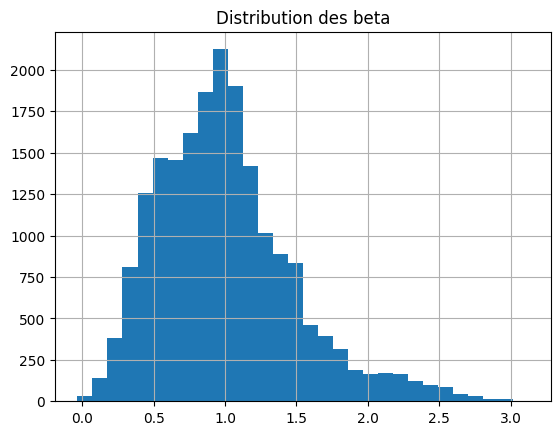

In [59]:
import matplotlib.pyplot as plt

#beta test : are the beta coherent 
# pvalue, beta, R², alpha → mean
beta_cols = ["Beta", "Alpha", "R2", "p_value"]
beta_means = beta_df[beta_cols].mean()
beta_std = beta_df[beta_cols].std()

print("Standard deviation is:", beta_std)
print("Means is:", beta_means)

#beta histogram
beta_df["Beta"].hist(bins=30); plt.title("Distribution des beta"); plt.show()

In [60]:
#beta squared
beta_df["Beta_squared"] = beta_df["Beta"] ** 2

#merge with merge_monthly_df
beta_cols = beta_df[["Ticker", "Month", "Beta", "Beta_squared"]]
merged_monthly_df = (
    merged_monthly_df                  # ← celui que tu as obtenu plus haut
    .merge(beta_cols, on=["Ticker", "Month"], how="left")
)

print(merged_monthly_df.tail())

      Ticker    Month      turn  monthly return    mom36m    mom12m     mom6m  \
20875    XOM  2020-08  0.005386       -0.032130  0.008328 -0.362815 -0.255610   
20876    XOM  2020-09  0.005508       -0.140461 -0.023628 -0.356944 -0.166098   
20877    XOM  2020-10  0.006165       -0.049810 -0.062642 -0.396380  0.093432   
20878    XOM  2020-11  0.007252        0.197116 -0.117741 -0.457824 -0.232063   
20879    XOM  2020-12  0.007198        0.081039 -0.107317 -0.495151 -0.268450   

          mom1m     chmom    maxret  ...  Px_Ask  Shares_Outstanding_Monthly  \
20875 -0.059035 -0.155537  0.050587  ...   39.94                4.228233e+09   
20876 -0.032130  0.035968  0.029506  ...   34.33                4.228233e+09   
20877 -0.140461  0.387806  0.042460  ...   32.67                4.228233e+09   
20878 -0.049810  0.023671  0.052539  ...   38.12                4.228234e+09   
20879  0.197116  0.185641  0.126602  ...   41.21                4.228234e+09   

       Mkt_Cap_Monthly  Px_Last 

In [61]:
#idiovol computation 

pivot["Market"] = pivot.mean(axis=1, skipna=True)

idio_vol_results = []

for ticker in tqdm(pivot.columns.drop("Market")):
    for current_month in pd.date_range(start=pivot.index.min() + pd.DateOffset(years=3),
                                       end=pivot.index.max(), freq="ME"):

        end_date = current_month
        start_date = end_date - pd.DateOffset(years=3)

        try:
            window = pivot.loc[start_date:end_date, [ticker, "Market"]].dropna()
        except KeyError:
            window = pivot.loc[(pivot.index >= start_date) & 
                                      (pivot.index <= end_date), [ticker, "Market"]].dropna()

        if len(window) >= 52:  # At least one year of data
            X = sm.add_constant(window["Market"])
            y = window[ticker]
            model = sm.OLS(y, X).fit()
            residuals = model.resid
            idio_std = np.std(residuals)

            idio_vol_results.append({
                "Ticker": ticker,
                "Month": current_month.to_period("M"),
                "Idiovol": idio_std
            })


idio_vol_df = pd.DataFrame(idio_vol_results)

100%|██████████| 58/58 [02:41<00:00,  2.78s/it]


In [62]:
# Vérifie et supprime la colonne Idiovol si elle est déjà présente
if "Idiovol" in merged_monthly_df.columns:
    print("Colonne 'Idiovol' déjà présente — suppression avant merge.")
    merged_monthly_df = merged_monthly_df.drop(columns=["Idiovol"])

# Merge proprement
merged_monthly_df = merged_monthly_df.merge(idio_vol_df, on=["Ticker", "Month"], how="left")

# Vérifie le résultat
print(merged_monthly_df.tail())


      Ticker    Month      turn  monthly return    mom36m    mom12m     mom6m  \
20875    XOM  2020-08  0.005386       -0.032130  0.008328 -0.362815 -0.255610   
20876    XOM  2020-09  0.005508       -0.140461 -0.023628 -0.356944 -0.166098   
20877    XOM  2020-10  0.006165       -0.049810 -0.062642 -0.396380  0.093432   
20878    XOM  2020-11  0.007252        0.197116 -0.117741 -0.457824 -0.232063   
20879    XOM  2020-12  0.007198        0.081039 -0.107317 -0.495151 -0.268450   

          mom1m     chmom    maxret  ...  Shares_Outstanding_Monthly  \
20875 -0.059035 -0.155537  0.050587  ...                4.228233e+09   
20876 -0.032130  0.035968  0.029506  ...                4.228233e+09   
20877 -0.140461  0.387806  0.042460  ...                4.228233e+09   
20878 -0.049810  0.023671  0.052539  ...                4.228234e+09   
20879  0.197116  0.185641  0.126602  ...                4.228234e+09   

       Mkt_Cap_Monthly  Px_Last      Volume  baspread     dolvol      mvel1  \
2

In [63]:
#check des datas : yearly (continuer le reste)
covariate_cols = ["agr", "cashpr", "chinv", "depr", "dy", "ep", "invest", "rd_mve", "sp"]

#mean of each covariates
covariate_means = yearly_df[covariate_cols].mean()
print("Moyennes des covariates :")
print(covariate_means)

#standard-deviation of each covariate
covariate_stds = yearly_df[covariate_cols].std()
print("\nÉcarts-types des covariates :")
print(covariate_stds)

Moyennes des covariates :
agr         0.106510
cashpr    124.939467
chinv       0.004935
depr        0.104531
dy         -0.022139
ep          0.044248
invest      0.047150
rd_mve      0.051214
sp          0.865267
dtype: float64

Écarts-types des covariates :
agr          0.237048
cashpr    2483.932928
chinv        0.076170
depr         0.068795
dy           0.067775
ep           0.110050
invest       0.252321
rd_mve       0.146870
sp           1.120341
dtype: float64


In [64]:
print(yearly_df.dtypes)

Date                         datetime64[ns]
Total_Assets                        float64
Common_Equity                       float64
Cash_And_Investments                float64
R&D_Expenses                        float64
Inventories                         float64
Dividends_Paid                      float64
Gross_Fixed_Assets                  float64
Income_Before_Extra_Items           float64
Sales_Revenue                       float64
Depreciation_Amortization           float64
Mkt_Cap_Yearly                      float64
Shares_Outstanding_Yearly           float64
Ticker                               object
agr                                 float64
cashpr                              float64
chinv                               float64
depr                                float64
dy                                  float64
ep                                  float64
invest                              float64
rd_mve                              float64
sp                              

In [65]:
#yearly : cross-sectional ranking and normalization

#first we need to standardize the date (because we exported the fiscal year, it's not the same for each stock)
yearly_df["Year"] = pd.to_datetime(yearly_df["Date"]).dt.year

# Filter to keep only years >= 1990
yearly_df = yearly_df[yearly_df["Year"] >= 1990]

covariates = ["agr", "cashpr", "chinv", "depr", "dy", "ep", "invest", "rd_mve", "sp"]

#Dictionnary to store the rankings
rankings = {}

for covariate in covariates:
    print(f"\n=== RANKING PAR {covariate.upper()} ===")
    
    for date, group in yearly_df.groupby("Year"): 
        
        #ranked by covariates (ascending)
        ranked_group = group[["Ticker", covariate]].sort_values(covariate).reset_index(drop=True)
        
        ranked_group["rank"] = range(1, len(ranked_group) + 1) #ranked from 1 to n
        n = len(ranked_group)
        ranked_group["score"] = ranked_group["rank"].apply(  # →[-1, 1]
            lambda r: 0 if n == 1 else 2*(r - 1)/(n - 1) - 1
        )
        
        #the ranking is stored in a dictionary
        if covariate not in rankings:
            rankings[covariate] = {}
        rankings[covariate][date] = ranked_group
        
        #print the first dates
        if date in list(yearly_df["Year"].unique())[:1]:  
            print(f"\nDate {date}:")
            print(ranked_group.head())

# Create yearly_covariates with original variables first
cols = ["Year", "Ticker"] + covariates
yearly_covariates = yearly_df[cols].dropna()   # optional .dropna() to keep complete cases

# Add normalized scores to yearly_covariates
for covariate in covariates:
    normalized_scores = []
    for _, row in yearly_covariates.iterrows():
        year = row["Year"]
        ticker = row["Ticker"]
        if covariate in rankings and year in rankings[covariate]:
            ticker_data = rankings[covariate][year][rankings[covariate][year]["Ticker"] == ticker]
            if not ticker_data.empty:
                normalized_scores.append(ticker_data["score"].iloc[0])
            else:
                normalized_scores.append(np.nan)
        else:
            normalized_scores.append(np.nan)
    
    yearly_covariates[f"{covariate}_normalized"] = normalized_scores


=== RANKING PAR AGR ===

Date 1990:
  Ticker       agr  rank     score
0   PCAR -0.052464     1 -1.000000
1    NOC -0.031913     2 -0.964912
2    ETN -0.012649     3 -0.929825
3    AMD -0.009554     4 -0.894737
4    TGT  0.024682     5 -0.859649

=== RANKING PAR CASHPR ===

Date 1990:
  Ticker    cashpr  rank     score
0    ADI -9.330228     1 -1.000000
1    AMD -2.131247     2 -0.964912
2     MU -2.054525     3 -0.929825
3    NOC -1.254157     4 -0.894737
4      F -1.228817     5 -0.859649

=== RANKING PAR CHINV ===

Date 1990:
  Ticker     chinv  rank     score
0     BA -0.110342     1 -1.000000
1   AAPL -0.040294     2 -0.964912
2     EA -0.038581     3 -0.929825
3   PCAR -0.011675     4 -0.894737
4      K -0.009148     5 -0.859649

=== RANKING PAR DEPR ===

Date 1990:
  Ticker      depr  rank     score
0     ED  0.028749     1 -1.000000
1    COP  0.045980     2 -0.964912
2    KMB  0.046318     3 -0.929825
3    XOM  0.051534     4 -0.894737
4     IP  0.053760     5 -0.859649

=== R

In [66]:
merged_monthly_df = merged_monthly_df[merged_monthly_df["Month"] >= pd.Period("1990-12", freq="M")]


nan_percent = merged_monthly_df.isna().mean() * 100
print(nan_percent.sort_values(ascending=False).round(2))


merged_monthly_df.to_excel("merged_monthly_df.xlsx")

Beta                          6.71
Beta_squared                  6.71
mom36m                        6.42
dolvol                        0.58
turn                          0.42
mvel1                         0.02
monthly return                0.02
Mkt_Cap_Monthly               0.02
Shares_Outstanding_Monthly    0.02
mom6m                         0.02
mom12m                        0.02
mom1m                         0.02
chmom                         0.02
maxret                        0.02
retvol                        0.02
baspread                      0.02
Volume                        0.02
Px_Ask                        0.02
Px_Bid                        0.02
Px_Last                       0.02
Month                         0.00
Ticker                        0.00
Idiovol                       0.00
dtype: float64


In [67]:
beta_df.to_excel("beta_df.xlsx")

In [70]:
def rank_and_normalize(df, date_col, group_col, covariates, min_year=1990):
    """
    Effectue un classement cross-sectionnel [-1,1] pour chaque covariable donnée.
    
    Parameters:
        df (pd.DataFrame) : DataFrame de départ
        date_col (str) : nom de la colonne date (ex : 'Date', 'Month')
        group_col (str) : nom de la colonne de groupe (ex : 'Year', 'Month')
        covariates (list of str) : liste des noms des covariables à normaliser
        min_year (int) : pour filtrer les observations à partir d’une certaine année (optionnel)

    Returns:
        pd.DataFrame : DataFrame avec colonnes normalisées ajoutées
    """
    df = df.copy()

    # Conversion date si nécessaire
    if not np.issubdtype(df[date_col].dtype, np.integer):
        df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

    # Création de la colonne de regroupement (par exemple Year)
    if group_col == "Year":
        df["Year"] = df[date_col].dt.year
    elif group_col == "Month":
        df["Month"] = df[date_col].dt.to_period("M")
    else:
        raise ValueError("group_col doit être 'Year' ou 'Month'")

    # Optionnel : filtrer sur min_year si pertinent
    if group_col == "Year":
        df = df[df["Year"] >= min_year]
    elif group_col == "Month":
        df = df[df["Month"] >= pd.Period(f"{min_year}-01", freq="M")]

    # Initialisation des scores
    ranking_dict = {}

    for cov in covariates:
        ranking_dict[cov] = {}
        for date_value, group in df.groupby(group_col):
            ranked = group[["Ticker", cov]].copy()
            ranked = ranked.sort_values(cov).reset_index(drop=True)
            n = len(ranked)
            ranked["rank"] = range(1, n + 1)
            ranked["score"] = ranked["rank"].apply(lambda r: 0 if n == 1 else 2*(r - 1)/(n - 1) - 1)
            ranking_dict[cov][date_value] = ranked

    # Création d’un DataFrame final avec les scores normalisés
    output_cols = [group_col, "Ticker"] + covariates
    final_df = df[output_cols].dropna().copy()

    for cov in covariates:
        scores = []
        for _, row in final_df.iterrows():
            date_val = row[group_col]
            ticker = row["Ticker"]
            score = ranking_dict[cov].get(date_val, pd.DataFrame())
            val = score[score["Ticker"] == ticker]["score"]
            scores.append(val.iloc[0] if not val.empty else np.nan)
        final_df[f"{cov}_normalized"] = scores

    return final_df

covariates_yearly = ["agr", "cashpr", "chinv", "depr", "dy", "ep", "invest", "rd_mve", "sp"]
yearly_covariates = rank_and_normalize(yearly_df, date_col="Date", group_col="Year", covariates=covariates_yearly)
